#### Data and dependencies

In [42]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv("data/tv_shows_data.csv")
df.head()

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
0,Stranger Things,Science Fiction Horror,"July 15, 2016",3,25
1,The Crown,Historical Drama,"November 4, 2016",4,40
2,Ozark,Crime Drama,"July 21, 2017",3,30
3,Lost in Space,Science Fiction,"April 13, 2018",2,20
4,Narcos: Mexico,Crime Drama,"November 16, 2018",2,20


#### Descriptive Analysis

In [44]:
df["Genre"].nunique()

171

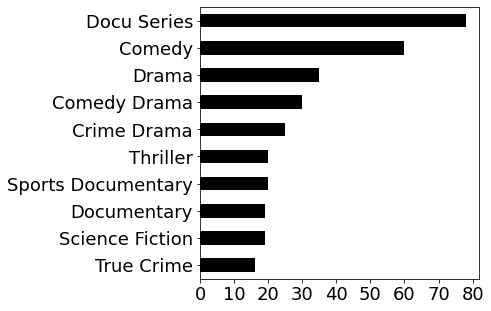

In [45]:
# top 10 genres' movies
df["Genre"].value_counts()[:10].plot(kind = "barh",figsize = (5, 5),
                                     fontsize = 18, color = "black").invert_yaxis()

### *Recommender Systems* are widely used to filter entertainment data. There are two types: *content-based* e *collaborative filtering*.

#### based on a TV show previously watched, what TV shows should be recommended to a netflix user?

In [46]:
    # to compute features similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
    # to extract features
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorizer = TfidfVectorizer(stop_words = "english") # convert a collection of raw documents
                                                     # to a matrix of TF-IDF features

                                                     # TF-IDF = TF(t, d) x IDF(t) (dot product)
                                                     # TF -> term frequency vector
                                                     # IDF -> inverse document frequency


df["Title"] = df["Title"].fillna("") # removing NaN

count_series_matrix = vectorizer.fit_transform(df["Title"]) # document-term matrix

In [48]:
count_series_matrix.shape

(641, 1014)

#### from the shape of the the matrix token I can conclude that 1106 different vocabularies/words in the dataset class "title".

In [49]:
cosine_sim = linear_kernel(count_series_matrix, count_series_matrix)

In [50]:
cosine_sim.shape

(641, 641)

In [51]:
cosine_sim[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### a 641x641 matrix because each TV has a cosine similarity score with every other TV.

In [52]:
indices = pd.Series(df.index, index = df["Title"]).drop_duplicates()
indices[:5]

Title
Stranger Things    0
The Crown          1
Ozark              2
Lost in Space      3
Narcos: Mexico     4
dtype: int64

In [53]:
def recommender(title, cosine_sim = cosine_sim):
    title_idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[title_idx])) # similarity score of all TV shows with the
                                                        # TV show previoulsy watched
        
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True) # reverse to get the top matched scores
    sim_scores = sim_scores[1:11] # top 10: notice we don't take the first one
                                  # because it's the same movie (cosine_sim(x, x) = 1)
    
    shows_indices = [idx[0] for idx in sim_scores] # recommended TV shows' indices
    
    return df["Title"].iloc[shows_indices]

#### I just finished *The Umbrealla Academy*, so what TV show should I watch next?

In [54]:
recommender("The Umbrella Academy")

227    Greenhouse Academy
0         Stranger Things
1               The Crown
2                   Ozark
3           Lost in Space
4          Narcos: Mexico
6            Black Summer
7            Another Life
8            Criminal: UK
9            Raising Dion
Name: Title, dtype: object

In [55]:
all_recommendations = recommender("The Umbrella Academy")

# top recommendations to users who just finished The Umbrella Academy
df_recommendations = df[df["Title"].isin(all_recommendations)]
df_recommendations

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
0,Stranger Things,Science Fiction Horror,"July 15, 2016",3,25
1,The Crown,Historical Drama,"November 4, 2016",4,40
2,Ozark,Crime Drama,"July 21, 2017",3,30
3,Lost in Space,Science Fiction,"April 13, 2018",2,20
4,Narcos: Mexico,Crime Drama,"November 16, 2018",2,20
6,Black Summer,Zombie Drama,"April 11, 2019",1,8
7,Another Life,Science Fiction Drama,"July 25, 2019",1,10
8,Criminal: UK,Police Procedural Anthology Series,"September 20, 2019",2,7
9,Raising Dion,Superhero Science Fiction Drama,"October 4, 2019",1,9
227,Greenhouse Academy,Science Fiction Teen Drama,"September 8, 2017",4,40
